In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import cmath

In [6]:
def base_fn(z, c):
    return z * z + c

In [25]:
def is_c_stable(z, c):
    ix = 0
    while ix < 40:
        z = base_fn(z, c)
        m, a = cmath.polar(z)
        if m > 10000 or m < -10000:
            return False
        
        ix += 1
        
    return True

In [26]:
space = np.zeros((1000, 1000))

In [27]:
def create_julia_set(param_c):
    min_re = -2.0
    max_re = 2.0
    min_im = -2.0
    max_im = 2.0
    re_range = max_re - min_re
    im_range = max_im - min_im

    max_x = space.shape[0]
    max_y = space.shape[1]

    for x in range(0, max_x):
        for y in range(0, max_y):
            re = x / max_x * re_range + min_re
            im = y / max_y * im_range + min_im

            z = complex(re, im)

            is_stable = is_c_stable(z, param_c)

            if is_stable:
                space[y, x] = 0.0
            else:
                space[y, x] = 1.0

    return space       

In [44]:
def create_julia_set(width, height, max_iter, param_c):
    space = np.zeros((width, height))
    
    min_re = -2.0
    max_re = 2.0
    min_im = -2.0
    max_im = 2.0
    re_range = max_re - min_re
    im_range = max_im - min_im

    re = np.linspace(min_re, max_re, width)
    im = np.linspace(min_im, max_im, height)
    real, imaginary = np.meshgrid(re, im)
    
    z = real + 1j * imaginary
    img = np.zeros((width, height))

    for i in range(max_iter):
        mask = np.abs(z) < 2
        z[mask] = z[mask] * z[mask] + param_c
        #img += mask
        
    space = np.abs(z) > 2

    return space 

In [45]:
def draw_julia_set(width, height, max_iter, param_c):
    mset = create_julia_set(width, height, max_iter, param_c)
    img = mset * 255.0    
    fig = plt.figure(figsize=(16, 16))
    plt.imshow(img, cmap="gray")

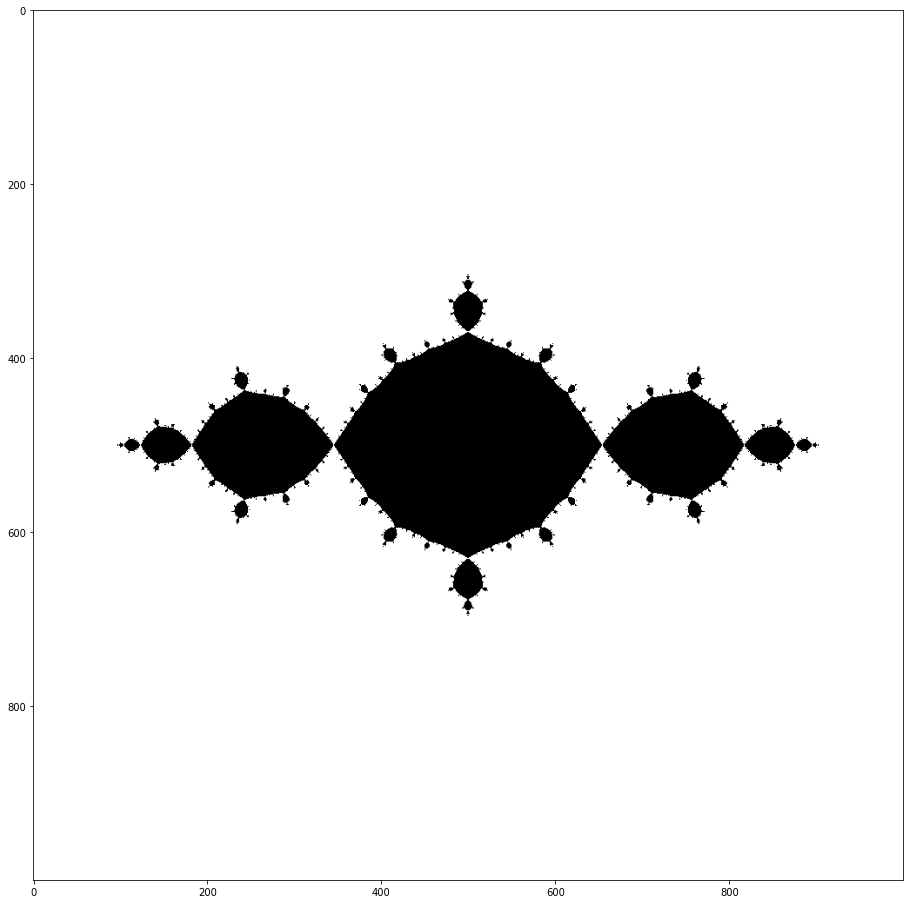

In [46]:
draw_julia_set(1000, 1000, 100, complex(-1, 0))

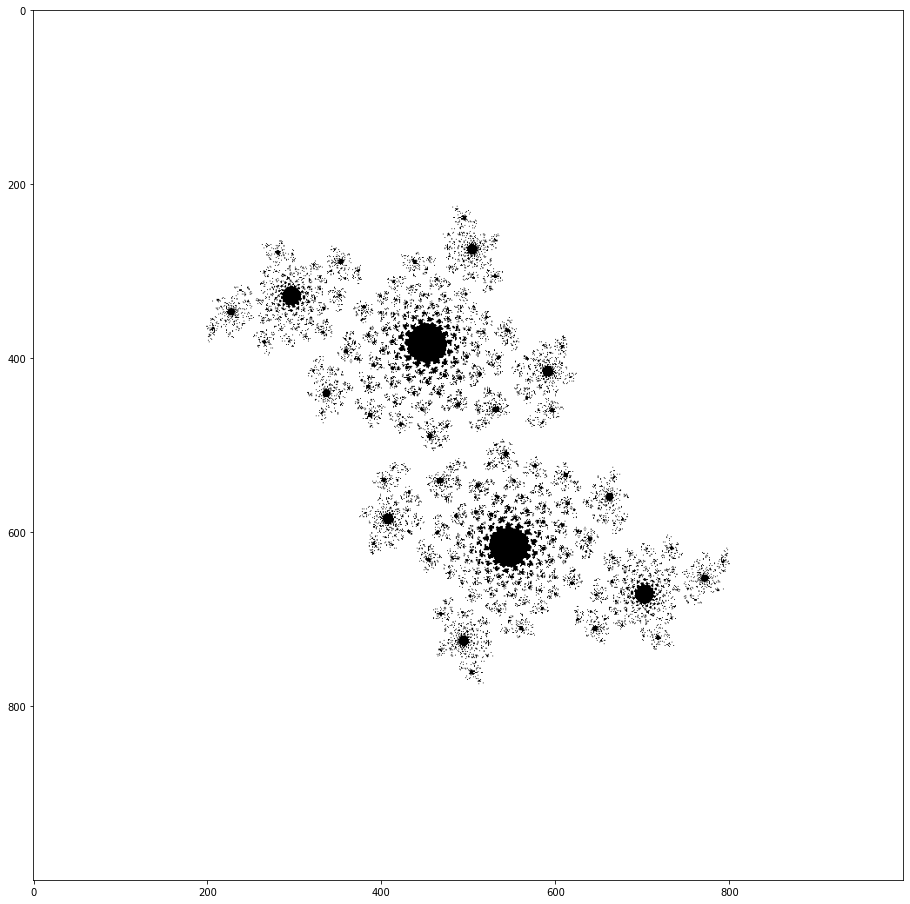

In [50]:
draw_julia_set(1000, 1000, 100, complex(0, -0.65))

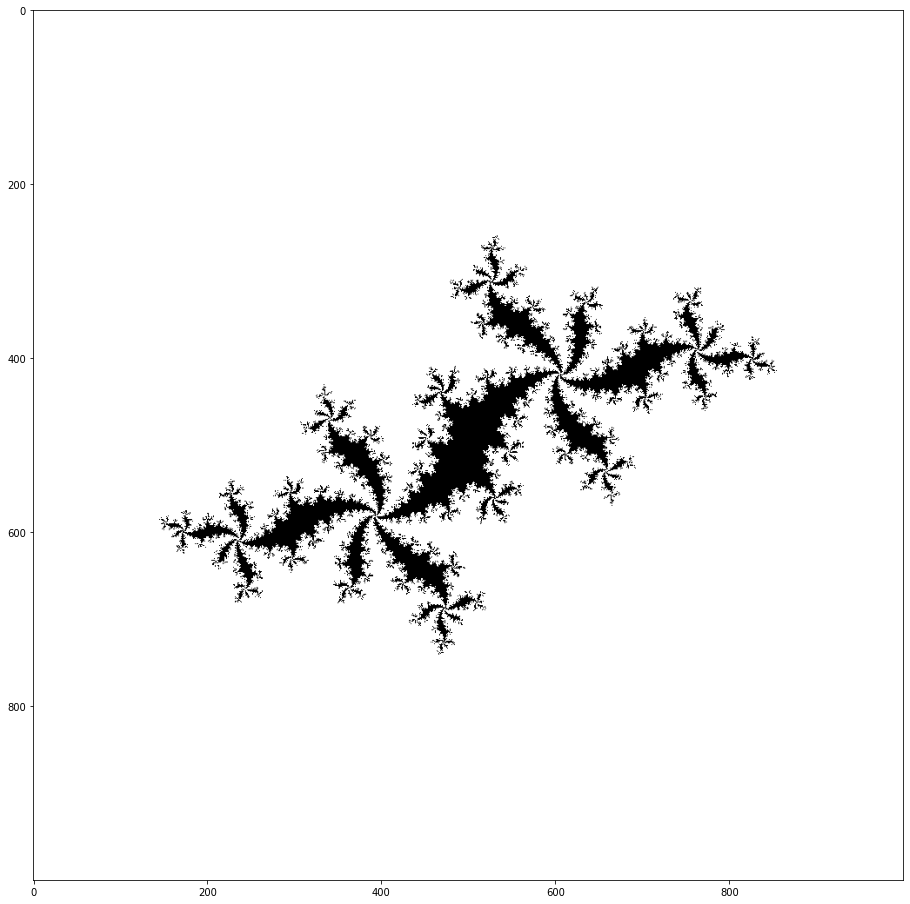

In [42]:
draw_julia_set(1000, 1000, 100, complex(-0.5, 0.6))